In [9]:
# SETTINGS
import matplotlib.pyplot as plt

RUNS = {
    "Generation 0": "game_runs-rand_input_just_two.csv",
    "Generation 1": "Generation 1/game_runs_gen1.csv",
    "Generation 2": "Generation 2/game_runs_temp=0.5.csv",
    "Generation 3": "Generation 3/game_runs.csv",
}

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc("font", size=MEDIUM_SIZE)
plt.rc("axes", titlesize=MEDIUM_SIZE, labelsize=MEDIUM_SIZE)
plt.rc("xtick", labelsize=SMALL_SIZE)
plt.rc("ytick", labelsize=SMALL_SIZE)
plt.rc("legend", fontsize=SMALL_SIZE)
plt.rc("figure", titlesize=BIGGER_SIZE)

In [10]:
# Load files
import pandas as pd

for k, v in RUNS.items():
    RUNS[k] = pd.read_csv(v)

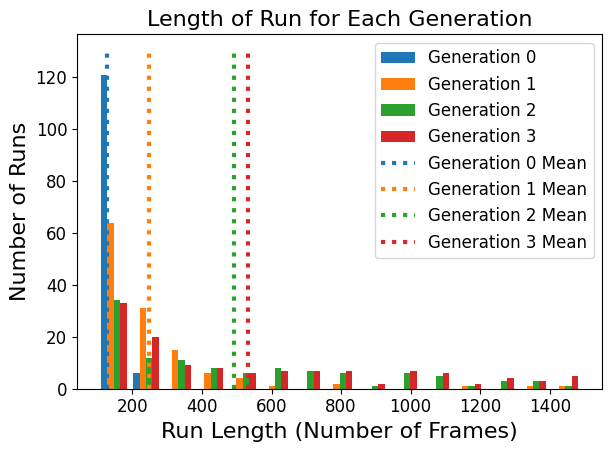

In [11]:
# Plot length
import matplotlib.colors as mcolors

colors = [c for c in mcolors.TABLEAU_COLORS][:len(RUNS)]

lengths = [v["Run Length"] for v in RUNS.values()]

plt.hist(lengths, 15, histtype='bar', color=colors, label=[k for k in RUNS.keys()])

lengths = [lens.mean() for lens in lengths]
for k, c, lens in zip(RUNS.keys(), colors, lengths):
    plt.vlines(lens, 0, 130, color=c, label="%s Mean" % k, linewidth=3, linestyles="dotted")

plt.title("Length of Run for Each Generation")
plt.xlabel("Run Length (Number of Frames)")
plt.ylabel("Number of Runs")
plt.legend()
plt.tight_layout()

plt.show()

[{'TAGGEE_HIT_OBS': 13, 'TAGGEE_OOB': 38, 'TAGGER_OOB': 61, 'TAGGER_HIT_OBS': 15}, {'TAGGER_HIT_OBS': 58, 'TAGGEE_OOB': 19, 'TAGGED': 7, 'TAGGER_OOB': 19, 'TAGGEE_HIT_OBS': 23}, {'TAGGER_HIT_OBS': 53, 'TAGGER_OOB': 19, 'TAGGED': 19, 'TAGGEE_HIT_OBS': 16, 'TAGGEE_OOB': 5}, {'TAGGED': 14, 'TAGGEE_HIT_OBS': 36, 'TAGGER_OOB': 7, 'TAGGEE_OOB': 19, 'TAGGER_HIT_OBS': 50}]


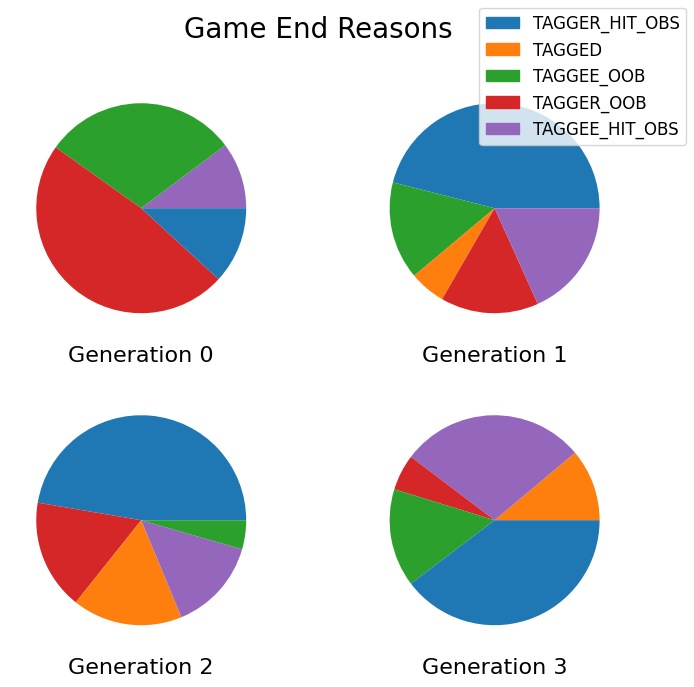

In [49]:
# Ending Reason
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

end_states = [v["End State"] for v in RUNS.values()]
new_end_states = [{} for _ in end_states]
for i in range(len(end_states)):
    for end_state in end_states[i]:
        new_end_states[i][end_state] = new_end_states[i].get(end_state, 0) + 1

print(new_end_states)

# Get colors
all_keys = set()
for end_state in new_end_states:
    all_keys.update(set(end_state.keys()))
color_dict = {k: c for k, c in zip(all_keys, mcolors.TABLEAU_COLORS)}

fig, axs = plt.subplots(2, 2, figsize=(7.5, 7))
for i, end_state in enumerate(new_end_states):
    axs[i//2][i%2].labelsize = SMALL_SIZE
    axs[i//2][i%2].pie(end_state.values(), labels=end_state.keys(), colors=[color_dict[k] for k in end_state.keys()], labeldistance=None)
    axs[i//2][i%2].set_xlabel(list(RUNS.keys())[i])

# axs[1, 1].legend()
fig.legend(handles=[mpatches.Patch(color=v, label=k) for k, v in color_dict.items()], loc="upper right")
fig.suptitle("Game End Reasons")
fig.tight_layout()

plt.show()